In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split as tts 
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential, losses
from tensorflow.keras.layers import Dense, Activation


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [5]:
# each image is 784 px
X_train[0].shape

(784,)

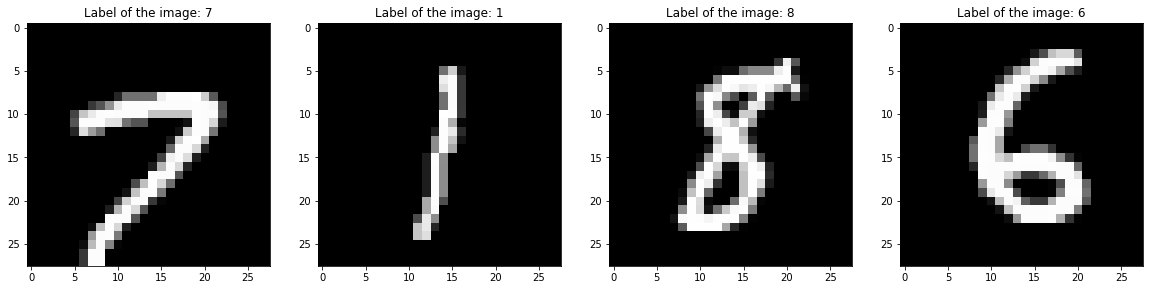

In [6]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

### 1. Build an ANN and train and test it using the MNIST data. This ANN should consist of two hidden layers and one output layer. All of the hidden layers should be dense. The first layer and the second layer should have neuron sizes of 32 and 16, respectively. Train this model for 20 epochs, and compare your training and test set performance with the example in the checkpoint. Is there any difference? If so, why?

In [21]:
model = Sequential()

model.add(Dense(32, input_shape=(input_dim,), activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5608 - accuracy: 0.8377
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2431 - accuracy: 0.9309
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1925 - accuracy: 0.9446
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1633 - accuracy: 0.9530
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1416 - accuracy: 0.9592
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1271 - accuracy: 0.9633
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1160 - accuracy: 0.9665
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1053 - accuracy: 0.9691
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9705
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0911 - accuracy: 0.9730

In [25]:
score = model.evaluate(X_test, y_test, verbose=2)

print('Test score: ', score[0])
print('Test accuracy: ', score[1])

313/313 - 1s - loss: 0.1141 - accuracy: 0.9659
Test score:  0.11406606435775757
Test accuracy:  0.9659000039100647


##### This model is pretty much the same as form the module reading. The only difference is I used 'adam' optimization instead of 'sgd'. I ahcieved train/test accuracies of 0.98/0.96 while the reading achieved 0.96/0.95. Both are pretty amazing.

### 2. In this task, build another ANN. This ANN should have five hidden layers and one output layer. All of the layers should be dense. The neuron numbers for the hidden layers should be 1024, 512, 256, 128, and 64. Train this model for 20 epochs, and test it using the same data from the previous task. Then compare your results. Is there any difference? If so, why?

In [26]:
model2 = Sequential()

#input layer
model2.add(Dense(1024, input_shape=(input_dim,), activation='relu'))

# hidden layer 1
model2.add(Dense(512, activation='relu'))

# hidden layer 2
model2.add(Dense(265, activation='relu'))

# hidden layer 3
model2.add(Dense(128, activation='relu'))

# hidden layer 4
model2.add(Dense(64, activation='relu'))

# output
model2.add(Dense(10, activation='softmax'))

In [27]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [28]:
model2.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2238 - accuracy: 0.9326
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0876 - accuracy: 0.9730
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0604 - accuracy: 0.9819
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0479 - accuracy: 0.9851
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0382 - accuracy: 0.9881
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0311 - accuracy: 0.9906
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0264 - accuracy: 0.9916
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0252 - accuracy: 0.9921
Epoch 9/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0215 - accuracy: 0.9934
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0207 - accuracy: 0.9935

In [29]:
score = model2.evaluate(X_test, y_test, verbose=2)

print('Test score: ', score[0])
print('Test accuracy: ', score[1])

313/313 - 1s - loss: 0.0798 - accuracy: 0.9835
Test score:  0.07976554334163666
Test accuracy:  0.9835000038146973


##### With these additional layers, there is improvement, but we are eking out a few more percentage points when the model is already pretty close to perfect. What we lose in time and resources probably isn't worth the marginal gains. With how the optimization parameter made a improvements from the lecture, other parameters could lead to better results without havcing to make such a deep network. 